- This notebook is for exploring and visualizing the original data set.
- GitHub Repo: https://github.com/wjx2018neu/71238---ALY-6140---03

In [1]:
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt

In [2]:
# function for converting values in column "date" to unix time stamps
def strtostamp(str):
    datetime_object = datetime.strptime(str, '%Y-%m-%d  %H:%M:%S')
    return calendar.timegm(datetime_object.utctimetuple())

In [3]:
energydata_complete = pd.read_csv("energydata_complete.csv")
energydata_complete.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# check if the records in column "date" is correct
for i in range(len(energydata_complete) - 1):
    if strtostamp(energydata_complete.iloc[i, 0]) + 600 != strtostamp(energydata_complete.iloc[i + 1, 0]):
        print("date wrong with index {0}".format(i))

In [5]:
energydata_complete.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# check if there is any null value
pd.isnull(energydata_complete).head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# check if there is any null value
pd.isnull(energydata_complete).sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

(array([ 228.,  179.,  384.,  991., 1836., 2105., 2287., 2478., 2035.,
        1945., 1802., 1000.,  314.,  354.,  610.,  431.,  639.,   83.,
          17.,   17.]),
 array([15.33   , 15.85325, 16.3765 , 16.89975, 17.423  , 17.94625,
        18.4695 , 18.99275, 19.516  , 20.03925, 20.5625 , 21.08575,
        21.609  , 22.13225, 22.6555 , 23.17875, 23.702  , 24.22525,
        24.7485 , 25.27175, 25.795  ]),
 <a list of 20 Patch objects>)

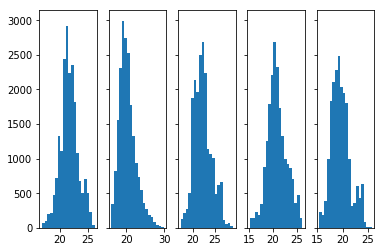

In [8]:
# visualizing a sample of columns of "Temperature"
fig, axs = plt.subplots(1, 5, sharey=True)
axs[0].hist(energydata_complete['T1'], bins=20)
axs[1].hist(energydata_complete['T2'], bins=20)
axs[2].hist(energydata_complete['T3'], bins=20)
axs[3].hist(energydata_complete['T4'], bins=20)
axs[4].hist(energydata_complete['T5'], bins=20)

(array([  18.,   25.,  517., 1855., 3943., 4253., 3770., 2167., 1010.,
         540.,  352.,  254.,  200.,  166.,  188.,  173.,  134.,   99.,
          51.,   20.]),
 array([29.815     , 33.14033333, 36.46566667, 39.791     , 43.11633333,
        46.44166667, 49.767     , 53.09233333, 56.41766667, 59.743     ,
        63.06833333, 66.39366667, 69.719     , 73.04433333, 76.36966667,
        79.695     , 83.02033333, 86.34566667, 89.671     , 92.99633333,
        96.32166667]),
 <a list of 20 Patch objects>)

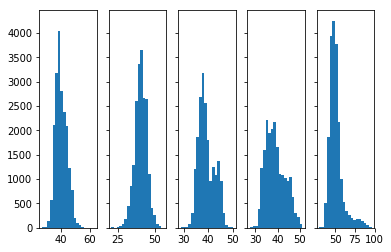

In [9]:
# visualizing a sample of columns of "Humidity"
fig, axs = plt.subplots(1, 5, sharey=True)
axs[0].hist(energydata_complete['RH_1'], bins=20)
axs[1].hist(energydata_complete['RH_2'], bins=20)
axs[2].hist(energydata_complete['RH_3'], bins=20)
axs[3].hist(energydata_complete['RH_4'], bins=20)
axs[4].hist(energydata_complete['RH_5'], bins=20)

In [10]:
# check the min, max and occurrences in column "Appliances"
print("min of \"Appliances\" is: {0} \nmax of \"Appliances\" is: {1}".format(
energydata_complete["Appliances"].min(),
energydata_complete["Appliances"].max())
)
print(energydata_complete["Appliances"].unique())
print(energydata_complete["Appliances"].value_counts().size)

min of "Appliances" is: 10 
max of "Appliances" is: 1080
[  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840]
92


(array([1.0744e+04, 5.4940e+03, 1.3590e+03, 3.6400e+02, 4.1900e+02,
        4.2000e+02, 2.8700e+02, 2.0600e+02, 1.4100e+02, 7.1000e+01,
        6.0000e+01, 7.0000e+01, 3.9000e+01, 3.0000e+01, 1.7000e+01,
        7.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  10. ,   63.5,  117. ,  170.5,  224. ,  277.5,  331. ,  384.5,
         438. ,  491.5,  545. ,  598.5,  652. ,  705.5,  759. ,  812.5,
         866. ,  919.5,  973. , 1026.5, 1080. ]),
 <a list of 20 Patch objects>)

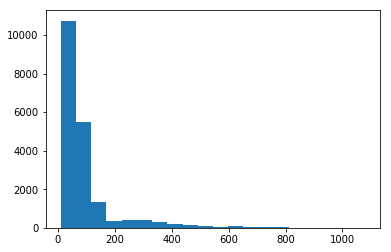

In [11]:
# plot the histogram of column "Appliances"
plt.hist(energydata_complete['Appliances'], bins=20)

In [12]:
# check the min, max and occurrences in column "lights"
print("min of \"lights\" is: {0} \nmax of \"lights\" is: {1}".format(
energydata_complete["lights"].min(),
energydata_complete["lights"].max())
)
print(energydata_complete["lights"].unique())
print(energydata_complete["lights"].value_counts().size)

min of "lights" is: 0 
max of "lights" is: 70
[30 40 50 70 60 10 20  0]
8


(array([1.5252e+04, 0.0000e+00, 2.2120e+03, 0.0000e+00, 0.0000e+00,
        1.6240e+03, 0.0000e+00, 0.0000e+00, 5.5900e+02, 0.0000e+00,
        0.0000e+00, 7.7000e+01, 0.0000e+00, 0.0000e+00, 9.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ,
        38.5, 42. , 45.5, 49. , 52.5, 56. , 59.5, 63. , 66.5, 70. ]),
 <a list of 20 Patch objects>)

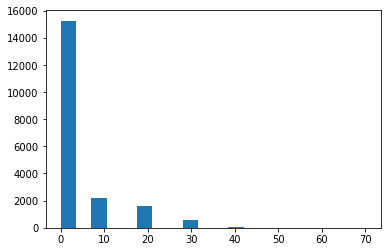

In [13]:
# plot the histogram of column "lights"
plt.hist(energydata_complete['lights'], bins=20)

In [14]:
# check the proportion of "0" in column "lights"
print((energydata_complete['lights'] == 0).sum()/len(energydata_complete))

0.7728401317456296
